In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic.drop('Cabin', axis=1, inplace=True)
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [7]:
average_age_by_sex = titanic.groupby('Sex')['Age'].mean()

In [8]:
def fill_missing_age(row):
    if pd.isna(row['Age']):
        return average_age_by_sex[row['Sex']]
    else:
        return row['Age']

# Apply the function to the DataFrame
titanic['Age'] = titanic.apply(fill_missing_age, axis=1)

In [9]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
titanic['Sex'] = titanic['Sex'].map({'female':0 , 'male': 1 })
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [22]:
pip install plotly

In [28]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

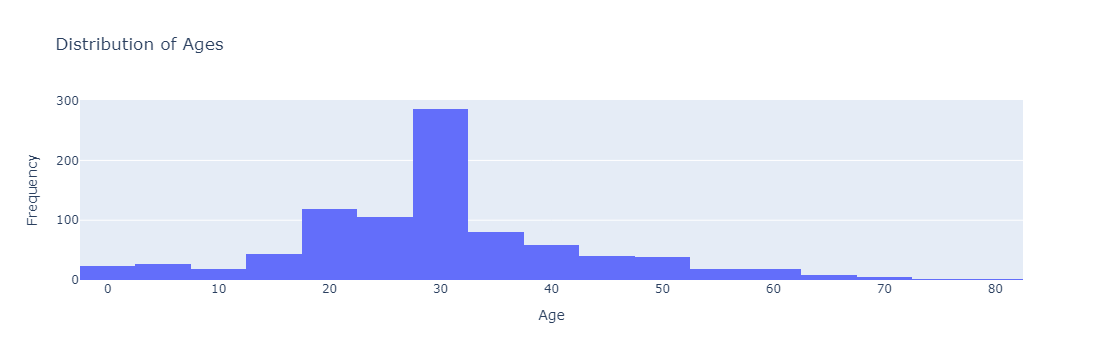

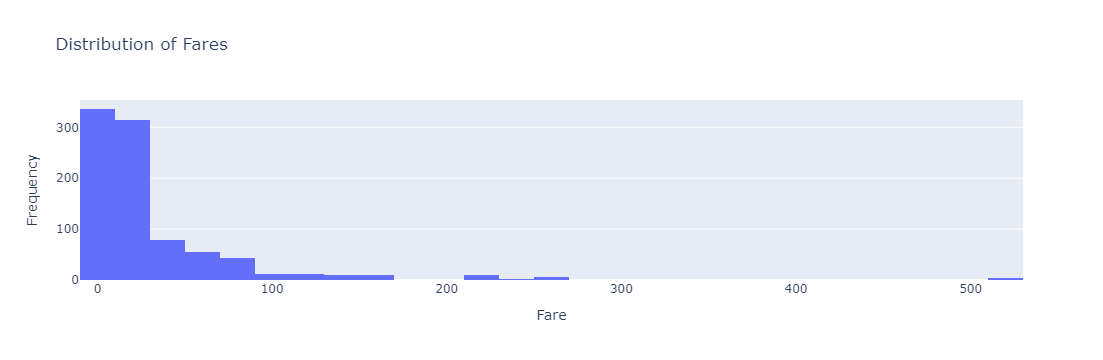

In [30]:

import plotly.graph_objects as go
import plotly.express as px

pyo.init_notebook_mode(connected=True)
# Load the Titanic dataset


# Histogram for Age
fig_age = px.histogram(titanic, x='Age', nbins=30, title='Distribution of Ages')
fig_age.update_xaxes(title_text='Age')
fig_age.update_yaxes(title_text='Frequency')

# Histogram for Fare
fig_fare = px.histogram(titanic, x='Fare', nbins=30, title='Distribution of Fares')
fig_fare.update_xaxes(title_text='Fare')
fig_fare.update_yaxes(title_text='Frequency')


# Show plots
fig_age.show()
fig_fare.show()


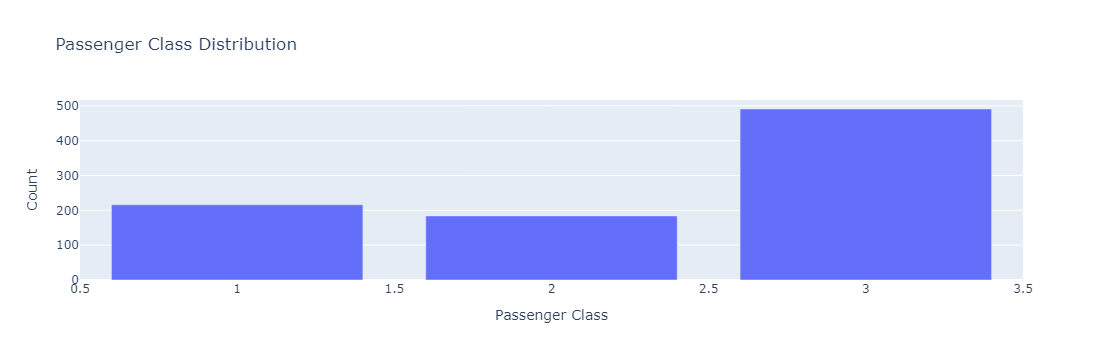

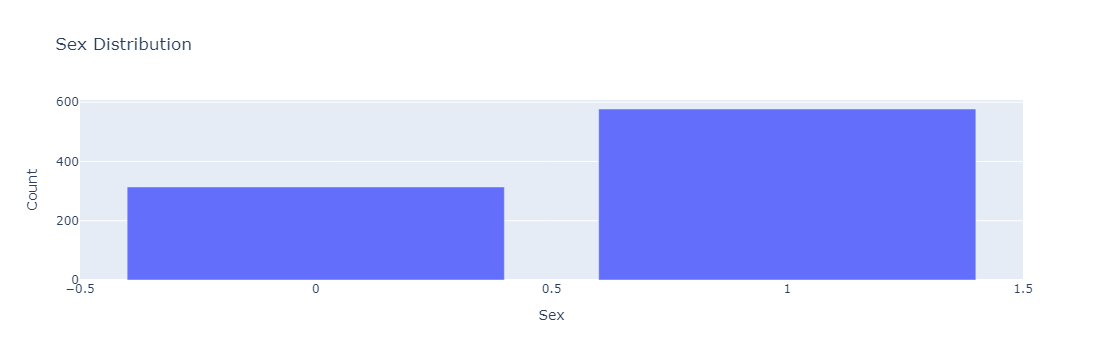

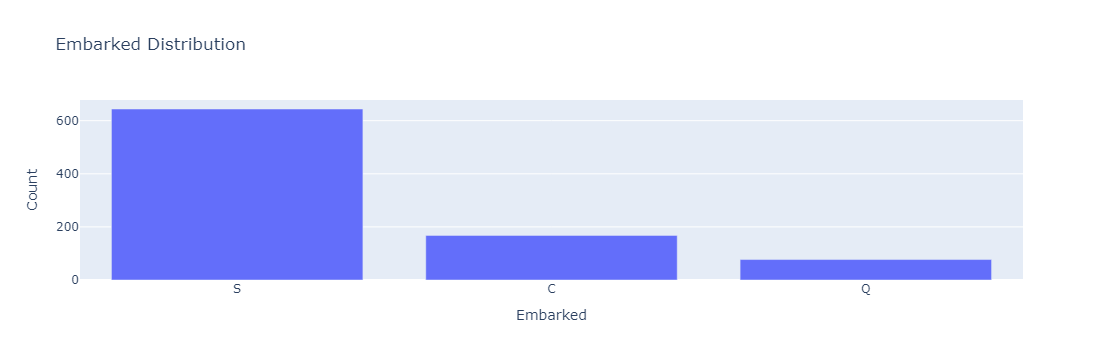

In [34]:
pclass_counts = titanic['Pclass'].value_counts().reset_index()
pclass_counts.columns = ['Pclass', 'Count']  # Rename columns for clarity

sex_counts = titanic['Sex'].value_counts().reset_index()
sex_counts.columns = ['Sex', 'Count']  # Rename columns for clarity

embarked_counts = titanic['Embarked'].value_counts().reset_index()
embarked_counts.columns = ['Embarked', 'Count']  # Rename columns for clarity

# Bar chart for Pclass
fig_pclass = px.bar(pclass_counts, x='Pclass', y='Count',
                    title='Passenger Class Distribution',
                    labels={'Pclass': 'Passenger Class', 'Count': 'Count'})

# Bar chart for Sex
fig_sex = px.bar(sex_counts, x='Sex', y='Count',
                 title='Sex Distribution',
                 labels={'Sex': 'Sex', 'Count': 'Count'})

# Bar chart for Embarked
fig_embarked = px.bar(embarked_counts, x='Embarked', y='Count',
                      title='Embarked Distribution',
                      labels={'Embarked': 'Embarked', 'Count': 'Count'})

# Show the plots
fig_pclass.show()
fig_sex.show()
fig_embarked.show()

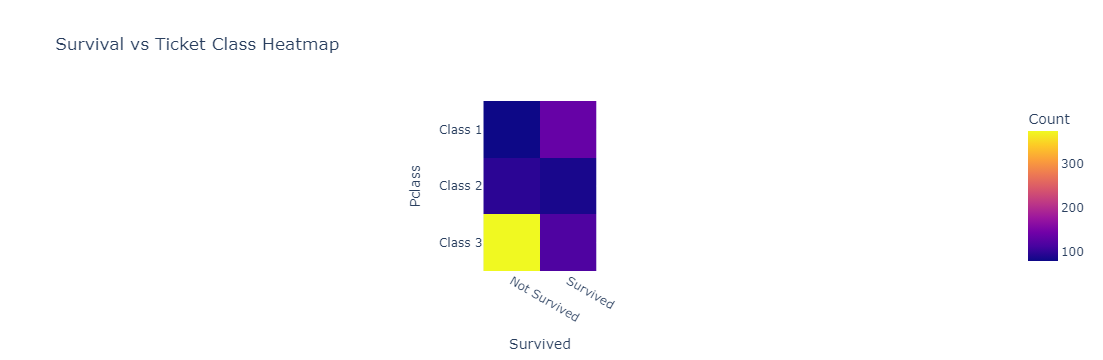

In [38]:
heatmap_data = titanic.pivot_table(index='Pclass', columns='Survived', aggfunc='size', fill_value=0)

# Plot the heatmap
fig_heatmap_pclass = px.imshow(heatmap_data,
                               title='Survival vs Ticket Class Heatmap',
                               labels={'color': 'Count'},
                               x=['Not Survived', 'Survived'],
                               y=['Class 1', 'Class 2', 'Class 3'])

fig_heatmap_pclass.show()

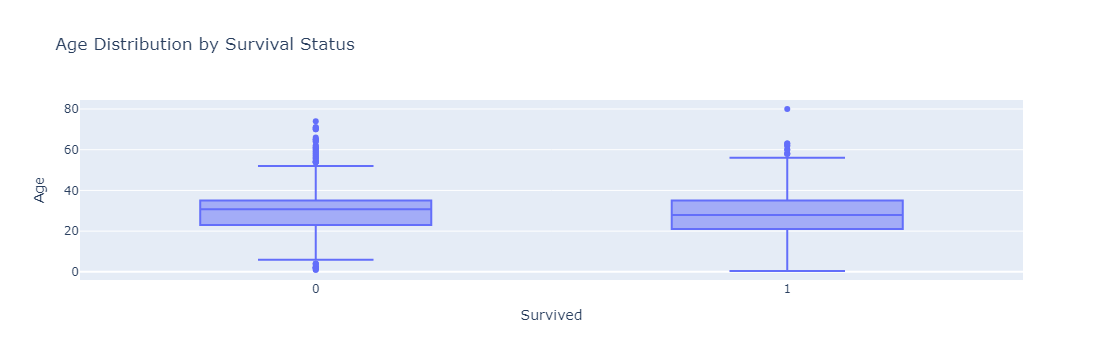

In [40]:

# Plot the box plot
fig_age_survival_box = px.box(titanic, x='Survived', y='Age',
                              title='Age Distribution by Survival Status',
                              labels={'Survived': 'Survived', 'Age': 'Age'})

fig_age_survival_box.show()


In [42]:
iris=pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [44]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [46]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


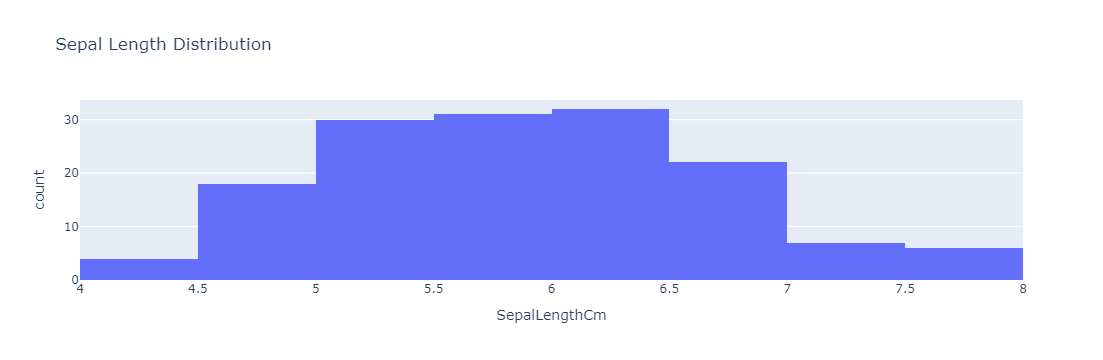

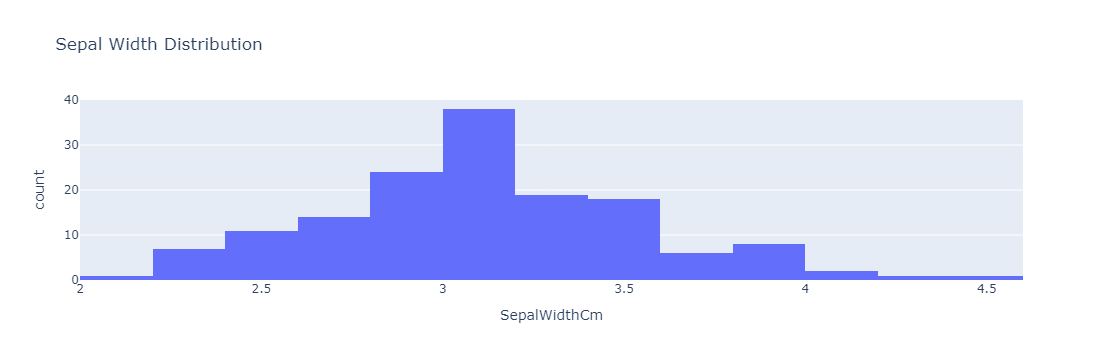

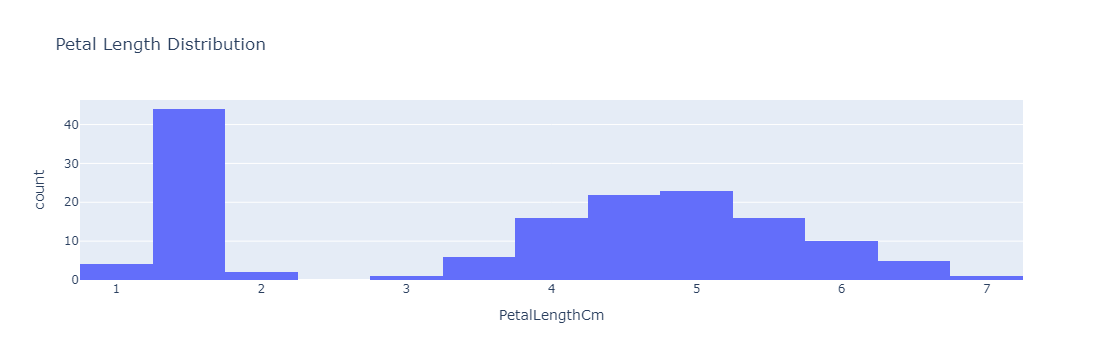

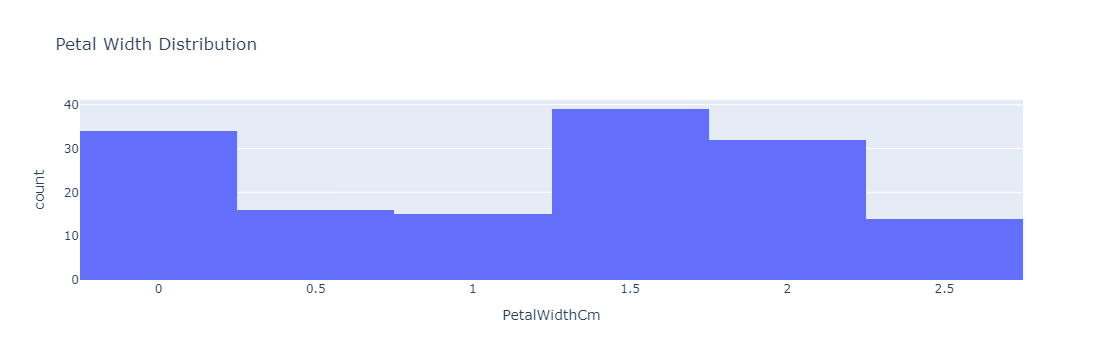

In [50]:
fig_sepal_length = px.histogram(iris, x='SepalLengthCm', title='Sepal Length Distribution')
fig_sepal_width = px.histogram(iris, x='SepalWidthCm', title='Sepal Width Distribution')
fig_petal_length = px.histogram(iris, x='PetalLengthCm', title='Petal Length Distribution')
fig_petal_width = px.histogram(iris, x='PetalWidthCm', title='Petal Width Distribution')

# Show the histograms
fig_sepal_length.show()
fig_sepal_width.show()
fig_petal_length.show()
fig_petal_width.show()

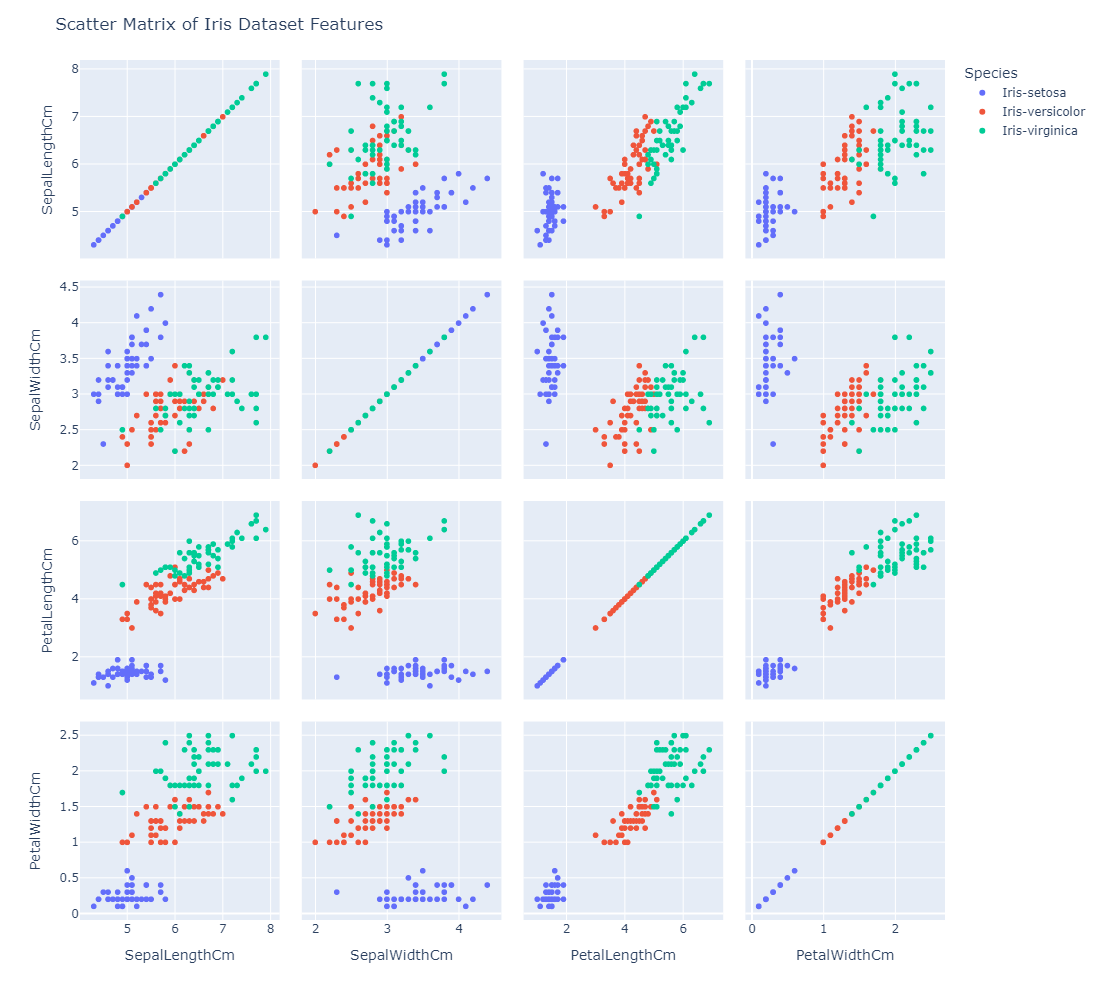

In [54]:
fig = px.scatter_matrix(iris, dimensions=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], color='Species')
fig.update_layout(title='Scatter Matrix of Iris Dataset Features', width=1000, height=1000)

# Show the scatter matrix
fig.show()

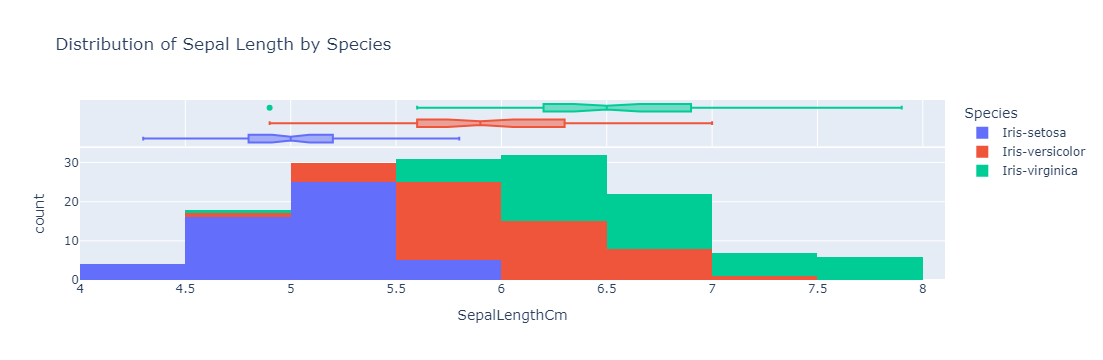

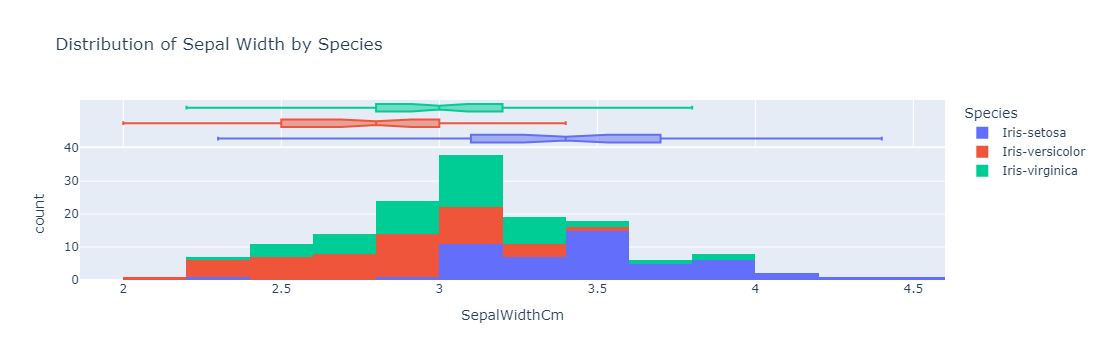

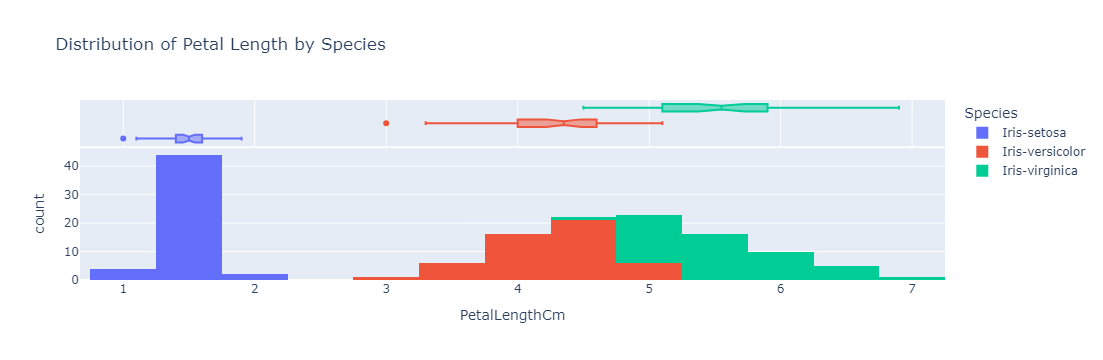

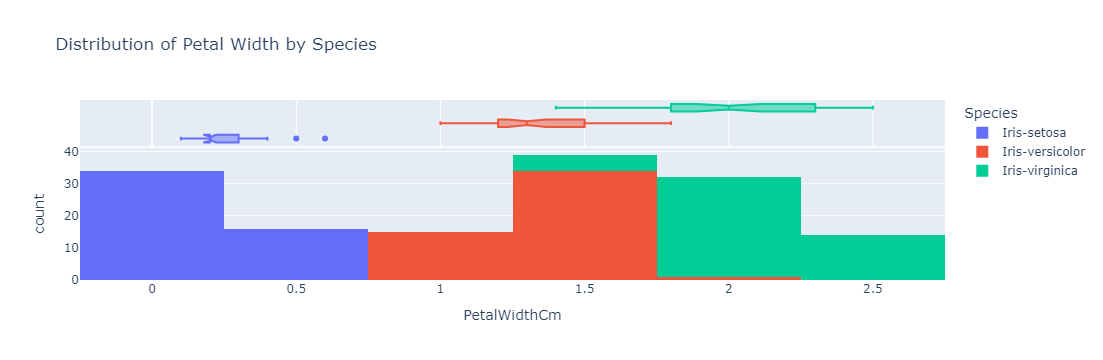

In [56]:
fig_sepal_length = px.histogram(iris, x='SepalLengthCm', color='Species', marginal='box',
                                title='Distribution of Sepal Length by Species')
fig_sepal_width = px.histogram(iris, x='SepalWidthCm', color='Species', marginal='box',
                               title='Distribution of Sepal Width by Species')
fig_petal_length = px.histogram(iris, x='PetalLengthCm', color='Species', marginal='box',
                                title='Distribution of Petal Length by Species')
fig_petal_width = px.histogram(iris, x='PetalWidthCm', color='Species', marginal='box',
                               title='Distribution of Petal Width by Species')

# Show the histograms
fig_sepal_length.show()
fig_sepal_width.show()
fig_petal_length.show()
fig_petal_width.show()

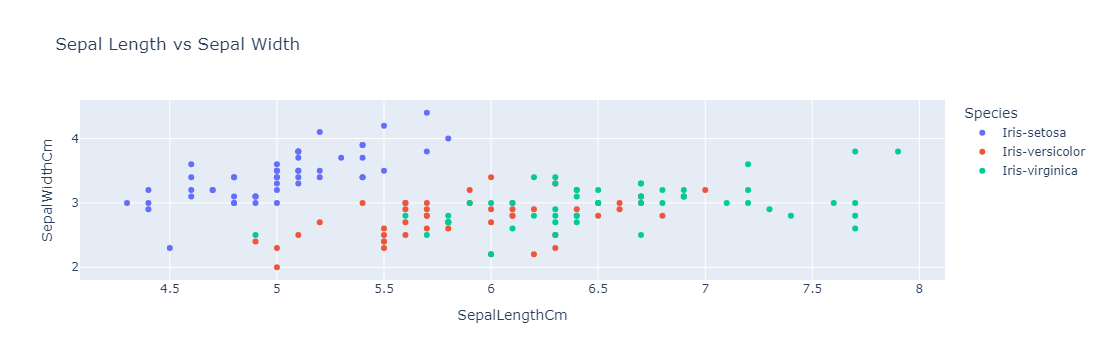

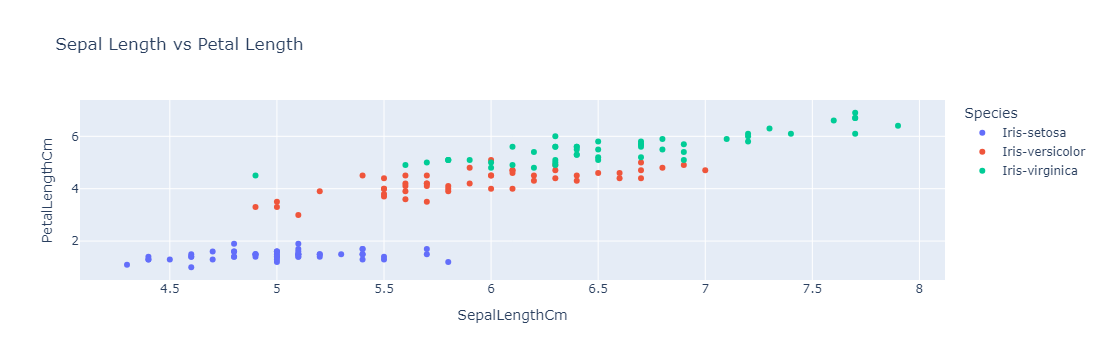

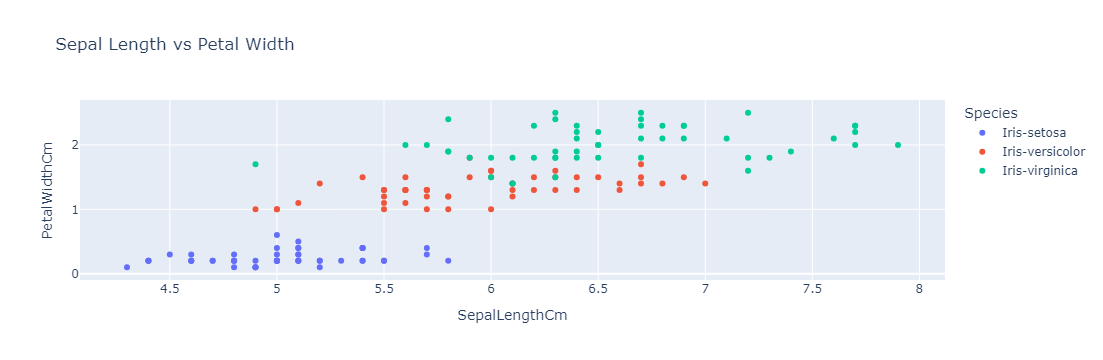

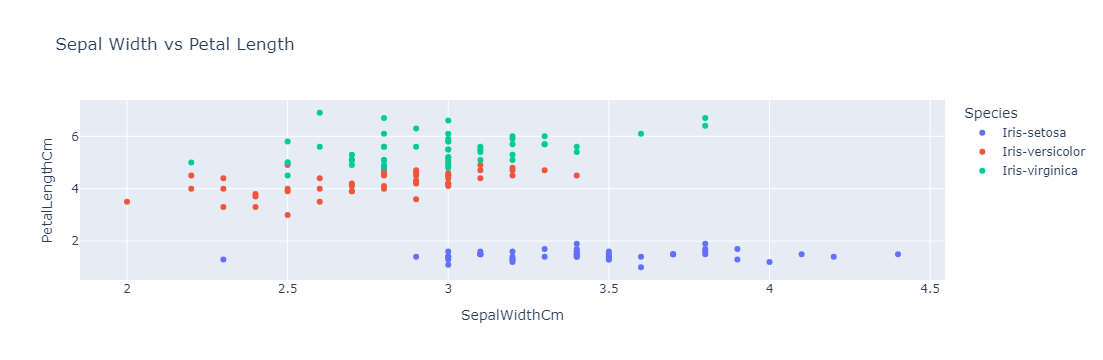

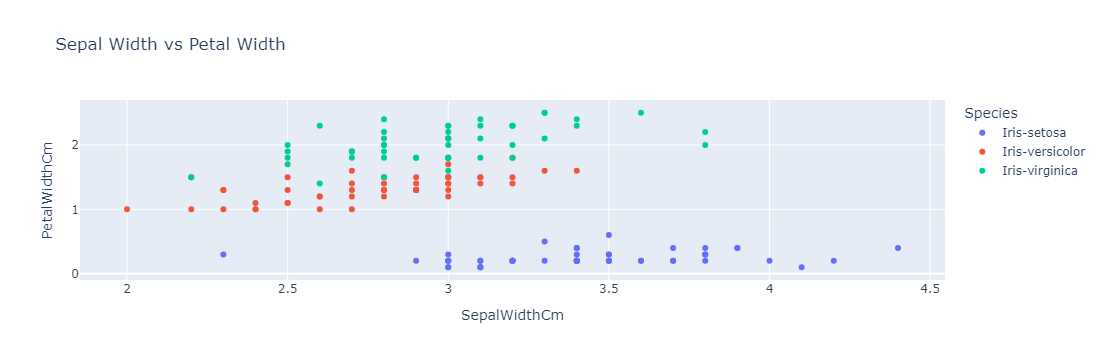

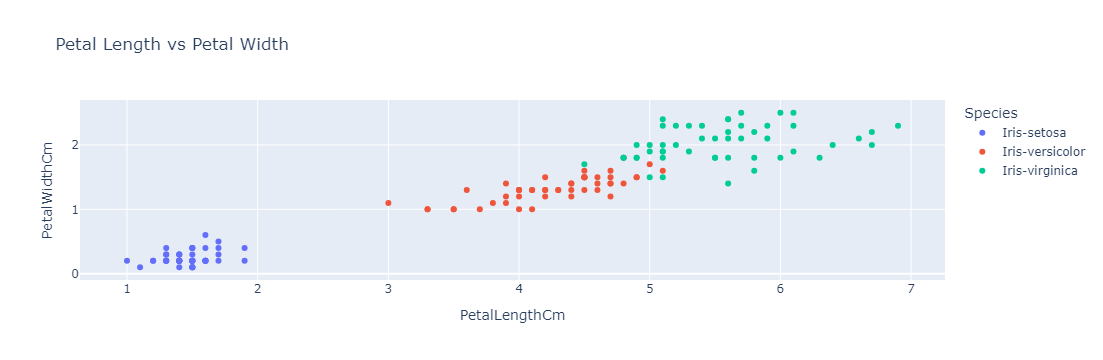

In [58]:
fig1 = px.scatter(iris, x='SepalLengthCm', y='SepalWidthCm', color='Species', title='Sepal Length vs Sepal Width')
fig2 = px.scatter(iris, x='SepalLengthCm', y='PetalLengthCm', color='Species', title='Sepal Length vs Petal Length')
fig3 = px.scatter(iris, x='SepalLengthCm', y='PetalWidthCm', color='Species', title='Sepal Length vs Petal Width')
fig4 = px.scatter(iris, x='SepalWidthCm', y='PetalLengthCm', color='Species', title='Sepal Width vs Petal Length')
fig5 = px.scatter(iris, x='SepalWidthCm', y='PetalWidthCm', color='Species', title='Sepal Width vs Petal Width')
fig6 = px.scatter(iris, x='PetalLengthCm', y='PetalWidthCm', color='Species', title='Petal Length vs Petal Width')

# Show the scatter plots
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()

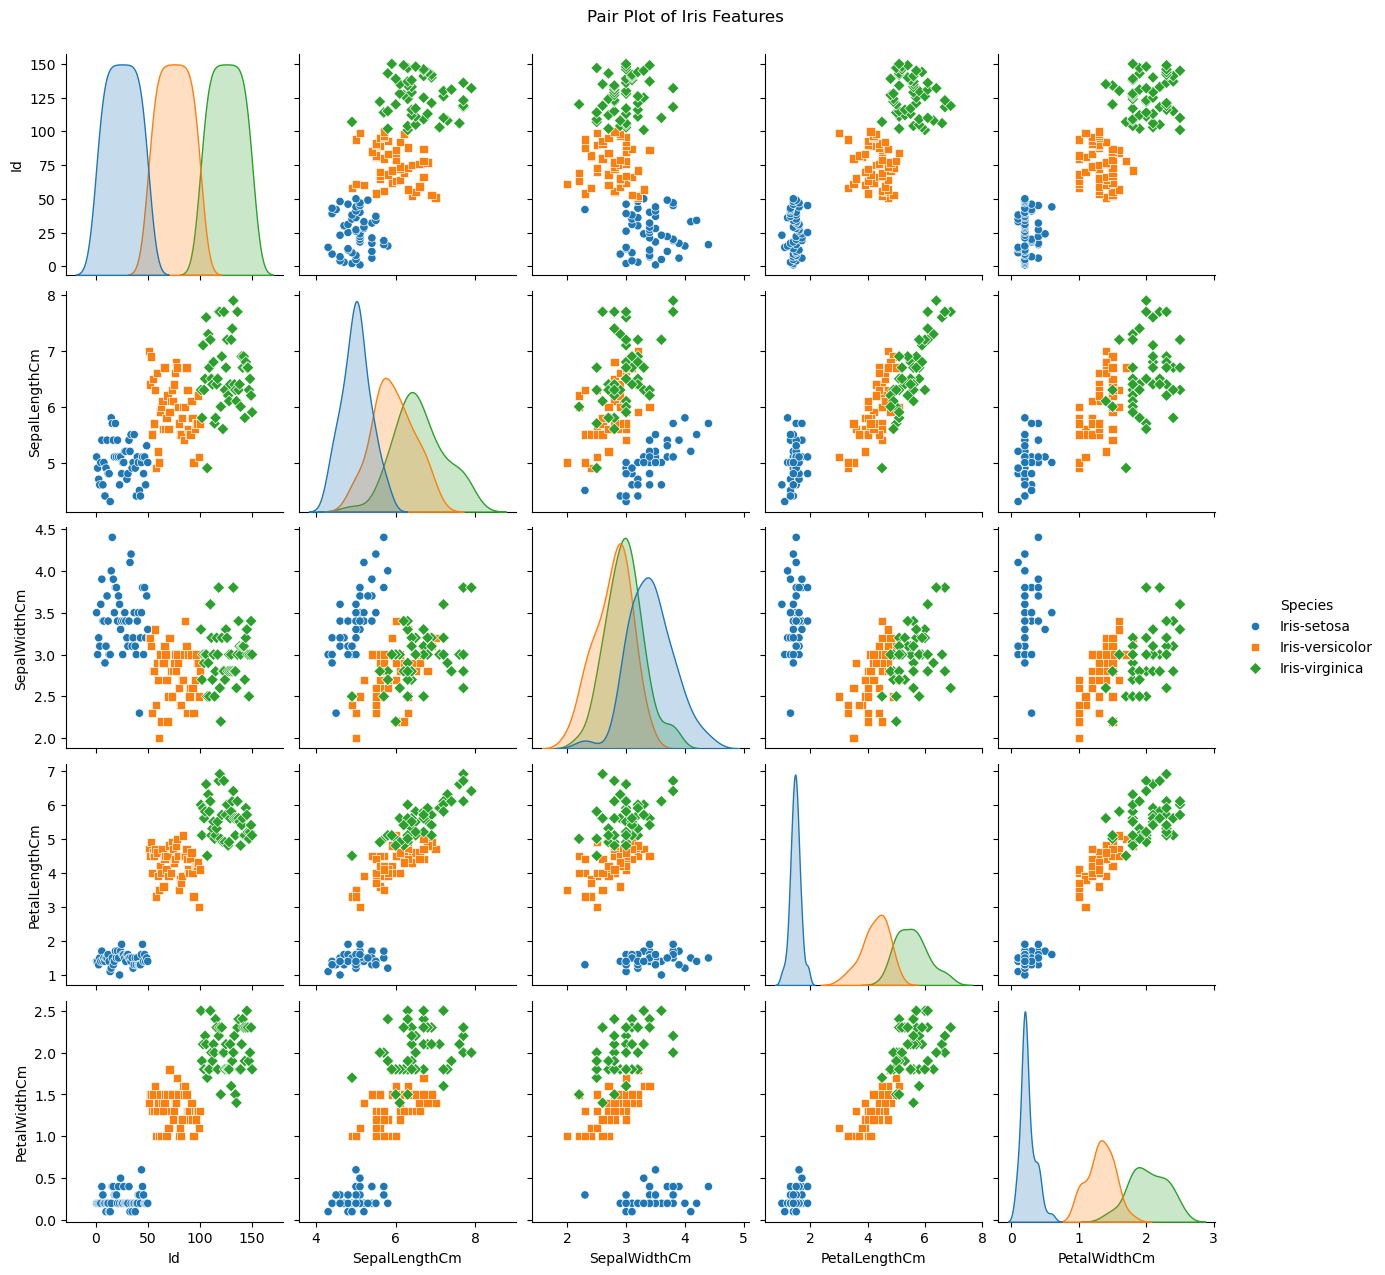

In [62]:
import seaborn as sns

import matplotlib.pyplot as plt

pair_plot = sns.pairplot(iris, hue='Species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Iris Features', y=1.02)
plt.show()